# T-test assignment



**Your name (unique name)**: Norah Harper

**Your U-M ID**: 46495145

**BEFORE YOU START**:

Copy this template to your own drive and **OUTSIDE** of the course folder. Then, edit on your own copy. **DO NOT** edit this template file directly.

If you are using Google Colab to finish your assignment, make a copy to your own drive and edit.  If you are running on your own local machine and run into issues with packages like `ModuleNotFoundError`, you can install the `colab` extension in your own VSCode, and running with the colab kernel. It will require you to log in with your UMICH google account.


## Introduction

<center> <h3> Do spoken or written words better express intelligence? </h3></center>  
This assignment uses the open data from Experiment 4 of Schroeder and Epley (2015) to teach independent
samples <em>t</em>-tests. Results of the activity provided below should exactly reproduce the results described in the paper.

**CITATION**  
Schroeder, J., & Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a
job candidate’s appeal. Psychological Science, 26, 877-891.

**LEARNING OBJECTIVES**  
* Conduct independent samples t-tests with Python
* Interpret the t-test results in the context of the research question
* Generate a t-test figure with APA guidelines
* Review the use of Python functions and packages including `pandas`, `seaborn` and `matplotlib`

**STUDY DESCRIPTION**  
Imagine you were a job candidate trying to pitch your skills to a potential employer. Would you be more
likely to get the job after giving a short speech describing your skills, or after writing a short speech and
having a potential employer read those words? That was the question raised by Schroeder and Epley
(2015). The authors predicted that a person’s speech (i.e., vocal tone, cadence, and pitch) communicates
information about their intellect better than their written words (even if they are the same words as in
the speech).

To examine this possibility, the authors randomly assigned 39 professional recruiters for *Fortune 500*
companies to one of two conditions. In the audio condition, participants listened to audio recordings of a
job candidate’s spoken job pitch. In the transcript condition, participants read a transcription of the job
candidate’s pitch. After hearing or reading the pitch, the participants rated the job candidates on three
dimensions: intelligence, competence, and thoughtfulness. These ratings were then averaged to create a
single measure of the job candidate’s intellect, with higher scores indicating the recruiters rated the
candidates as higher in intellect. The participants also rated their overall impression of the job candidate
(a composite of two items measuring positive and negative impressions). Finally, the participants
indicated how likely they would be to recommend hiring the job candidate (0 - not at all likely, 10 -
extremely likely).

**Note about programming**: Part of the assignment is designed to help you review or get familiar with Python functions and common packages. If you get stuck, it is totally fine!. Try to google the error messages, search documentations, and ask the teaching team for help.

In [1]:
# Load libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Uncomment and Set directories if you are using dataset from your own local machine
# data_dir = '<insert path to directory where dataset is located>'
# os.chdir(data_dir)


# Load dataset into dataframe
file_id = '0Bz-rhZ21ShvOei1MM24xNndnQ00'
resource_key = '0-gBQiGhF6zp2cH8g20zifJg'

# Construct a direct download link
direct_link = f'https://drive.google.com/uc?export=download&id={file_id}&resourcekey={resource_key}'
df = pd.read_csv(direct_link) 

df.head()

,CONDITION,compt,thought,intell,like,pos,neg,hire,age,gender,...,pnum,meanhire,meanintellect,meanimpression,centhire,centintellect,centimpression,Intellect_Rating,Impression_Rating,Hire_Rating
0,1,7,7,7,7,7,1,7,29,2,...,1,4.583333,5.722222,6.638889,2.416667,1.277778,1.361111,6.000000,7.000000,6
1,1,6,8,6,6,6,6,5,27,2,...,2,4.666667,5.577778,5.777778,0.333333,1.088889,-0.111111,5.666667,4.666667,4
2,1,7,8,6,9,9,1,6,27,2,...,3,4.666667,5.577778,5.777778,1.333333,1.422222,3.555556,6.000000,8.333333,5
3,0,4,3,6,6,6,6,5,40,2,...,4,4.583333,5.722222,6.638889,0.416667,-1.388889,-0.972222,3.333333,4.666667,4
4,0,2,3,1,2,2,8,2,32,2,...,5,4.583333,5.722222,6.638889,-2.583333,-3.722222,-4.305556,1.000000,1.333333,1


## Analyses

**Question 1**: Open the data file (called Schroeder and Epley 2015 Experiment 4 data). Explore the data file.
Note, you will not analyze all of these variables. *Try to find the variables that are relevant to the
study description above.*

In [5]:
# Start from checking describing the dataset
# Tips: You can use similar code from the correlation assignment to describe the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CONDITION          39 non-null     int64  
 1   compt              39 non-null     int64  
 2   thought            39 non-null     int64  
 3   intell             39 non-null     int64  
 4   like               39 non-null     int64  
 5   pos                39 non-null     int64  
 6   neg                39 non-null     int64  
 7   hire               39 non-null     int64  
 8   age                39 non-null     object 
 9   gender             39 non-null     object 
 10  time               39 non-null     float64
 11  wordcount          39 non-null     object 
 12  negR               39 non-null     int64  
 13  intellect          39 non-null     float64
 14  impression         39 non-null     float64
 15  speaker            39 non-null     int64  
 16  pnum               39 non-nu

In [33]:
# Analyse shape of the dataset and the available columns (.shape may be helpful!)
print(df.shape)


# Split the dataset into two conditions
audio_group_intellect = df[df['CONDITION'] == 1]['Intellect_Rating']
transcript_group_intellect = df[df['CONDITION'] == 0]['Intellect_Rating']

# Then analyze the shape of the dataset for each condition
print(audio_group_intellect.shape)
print(transcript_group_intellect.shape)


(39, 26)
(21,)
(18,)


**Question 2**: You first want compare participants in the audio condition to participants in the transcript
condition on the `Intellect_Rating` variable. Which type of analysis is appropriate, given the design
described above? 

We are using the `scipy` package to perform the t-test. You can start from the code from the slides. You can also find the documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html). One benefit of using the `scipy.stats.ttest_ind()` is that it directly returns, $t$, $p$ and degrees of freedoms without calculating the means and standard deviations on your own. 



In [34]:
t_stat_intellect, p_value_intellect = ttest_ind(audio_group_intellect, transcript_group_intellect)
print(t_stat_intellect, p_value_intellect)
means = [audio_group_intellect.mean(), transcript_group_intellect.mean()]
sems = [audio_group_intellect.sem(), transcript_group_intellect.sem()]
print(means)
print(sems)
n1 = len(audio_group_intellect)
n2 = len(transcript_group_intellect)
sd_pooled = np.sqrt(((n1-1)*audio_group_intellect.std(ddof=0)**2 + 
                      (n2-1)*transcript_group_intellect.std(ddof=0)**2) / (n1+n2-2))

# Cohen's d
cohens_d = (audio_group_intellect.mean() - transcript_group_intellect.mean()) / sd_pooled
print(f"Cohen's d: {cohens_d:.2f}")

3.5259329220482427 0.00114444149962868
[np.float64(5.634920634920636), np.float64(3.6481481481481493)]
[np.float64(0.3510413547629999), np.float64(0.4505078407898004)]
Cohen's d: 1.16


**Question 3**: Next compare participants in the audio condition to participants in the transcript condition on the
`Impression_Rating` variable.

In [26]:
# t-test based on Impression Rating, you can use what you just built!
audio_group = df[df['CONDITION'] == 1]['Impression_Rating']
transcript_group = df[df['CONDITION'] == 0]['Impression_Rating']
t_stat, p_value = ttest_ind(audio_group, transcript_group)
print(t_stat, p_value)
means = [audio_group.mean(), transcript_group.mean()]
sems = [audio_group.sem(), transcript_group.sem()]
print(means)
print(sems)
n1 = len(audio_group)
n2 = len(transcript_group)
sd_pooled = np.sqrt(((n1-1)*audio_group.std(ddof=0)**2 + 
                      (n2-1)*transcript_group.std(ddof=0)**2) / (n1+n2-2))

# Cohen's d
cohens_d = (audio_group.mean() - transcript_group.mean()) / sd_pooled
print(f"Cohen's d: {cohens_d:.2f}")

2.8507661790251806 0.007091060616710567
[np.float64(5.968253968253969), np.float64(4.074074074074073)]
[np.float64(0.4184278726443712), np.float64(0.5263952001315515)]
Cohen's d: 0.94


**Question 4**: Finally, compare participants in the audio condition to participants in the transcript condition on
the `Hire_Rating` variable.

In [27]:
# t-test based on Hire Rating
audio_group = df[df['CONDITION'] == 1]['Hire_Rating']
transcript_group = df[df['CONDITION'] == 0]['Hire_Rating']
t_stat, p_value = ttest_ind(audio_group, transcript_group)
print(t_stat, p_value)
means = [audio_group.mean(), transcript_group.mean()]
sems = [audio_group.sem(), transcript_group.sem()]
print(means)
print(sems)
n1 = len(audio_group)
n2 = len(transcript_group)
sd_pooled = np.sqrt(((n1-1)*audio_group.std(ddof=0)**2 + 
                      (n2-1)*transcript_group.std(ddof=0)**2) / (n1+n2-2))

# Cohen's d
cohens_d = (audio_group.mean() - transcript_group.mean()) / sd_pooled
print(f"Cohen's d: {cohens_d:.2f}")

2.620100218173143 0.012674511839824125
[np.float64(4.714285714285714), np.float64(2.888888888888889)]
[np.float64(0.4934951012583473), np.float64(0.4843221048378526)]
Cohen's d: 0.86


**Question 5**: Now it is time to review the results from above! Prepare an APA-style results paragraph briefly describing the results of the analyses performed above. Remember to interpret the results in the context of the research question.


An independent samples t-test revealed that participants in the audio group (M = 3.53, SD = 0.35) rated candidates as more intelligent than participants in the transcript condition (M = 3.65, SD = 0.45) t(37) = 3.53, p = 0.001, d = 1.16.
An independent samples t-test revealed that participants in the audio group (M = 5.97, SD = 0.42) rated candidates as more intelligent than participants in the transcript condition (M = 4.07, SD = 0.53) t(37) = 2.85, p = 0.007, d = 0.94.
An independent samples t-test revealed that participants in the audio group (M = 4.71, SD = 0.49) rated candidates as more intelligent than participants in the transcript condition (M = 2.88, SD = 0.48) t(37) = 2.85, p = 0.013, d = 0.86.

**Question 6**: Generate a figure to depict the results of the analyses performed above. Make sure to follow
APA guidelines, and include error bars representing +/- 1 standard error of the mean. 

This question is designed to help you get familiar with `matplotlib` and `seaborn`. You will be using these two packages all the time in Python. Try to follow the comments. I am sure you will get it! It is useful to refer to the documentations of the packages, e.g. [`seaborn.barplot` documentation](https://seaborn.pydata.org/generated/seaborn.barplot.html)

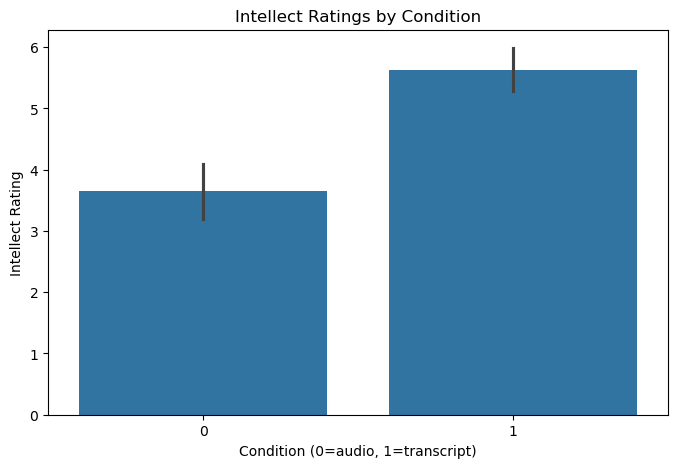

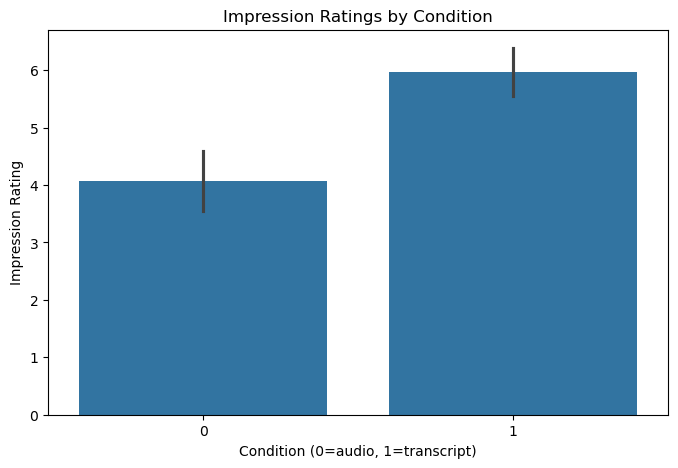

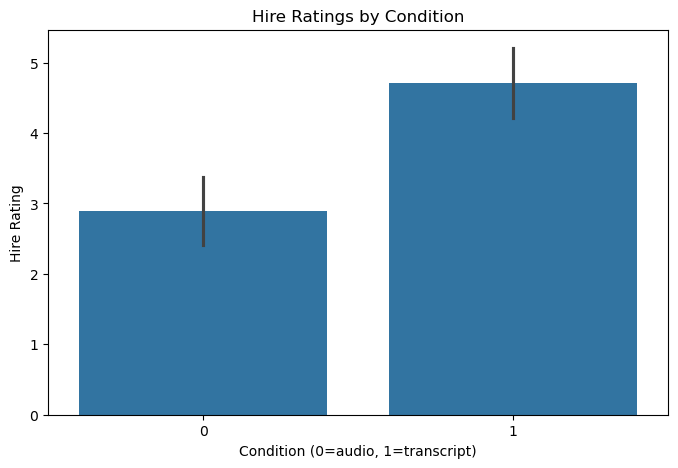

In [49]:
#print(df)
# Intellect_Rating Means
plt.figure(figsize=(8,5)) # Set up the size of the figure
# We will create a bar plot using `seaborn`. 
# It takes in the data, the variable for the x-axis, the variable for the y-axis. We set up te errorbar for you.
sns.barplot(data=df, x='CONDITION', y='Intellect_Rating', errorbar='se') 

# Every plot should have a nice labelling, including title, axis labels.
# Set up the title, x-axis label, y-axis label for your bar plot.
plt.title('Intellect Ratings by Condition')
plt.xlabel('Condition (0=audio, 1=transcript)')
plt.ylabel('Intellect Rating')

# Finally, show the plot
plt.show()



# Do the same for the other two variables
# Impression_Rating Means
plt.figure(figsize=(8,5)) # Set up the size of the figure
# We will create a bar plot using `seaborn`. 
# It takes in the data, the variable for the x-axis, the variable for the y-axis. We set up te errorbar for you.
sns.barplot(data=df, x='CONDITION', y='Impression_Rating', errorbar='se') 

# Every plot should have a nice labelling, including title, axis labels.
# Set up the title, x-axis label, y-axis label for your bar plot.
plt.title('Impression Ratings by Condition')
plt.xlabel('Condition (0=audio, 1=transcript)')
plt.ylabel('Impression Rating')

# Finally, show the plot
plt.show()

# Hire_Rating Means
plt.figure(figsize=(8,5)) # Set up the size of the figure
# We will create a bar plot using `seaborn`. 
# It takes in the data, the variable for the x-axis, the variable for the y-axis. We set up te errorbar for you.
sns.barplot(data=df, x='CONDITION', y='Hire_Rating', errorbar='se') 

# Every plot should have a nice labelling, including title, axis labels.
# Set up the title, x-axis label, y-axis label for your bar plot.
plt.title('Hire Ratings by Condition')
plt.xlabel('Condition (0=audio, 1=transcript)')
plt.ylabel('Hire Rating')

# Finally, show the plot
plt.show()


## Submission

This is the end of the assignment:) Please remember to save your work and submit your assignment in notebook `.ipynb` format on Canvas.